In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.shape

(500, 9)

In [7]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

## Data Exploration

In [10]:
df=df.rename(columns={'Serial No.':'no', 'GRE Score':'gre', 'TOEFL Score':'toefl', 'University Rating':'rating', 'SOP':'sop', 'LOR ':'lor',
                           'CGPA':'gpa', 'Research':'research', 'Chance of Admit ':'chance' })

In [11]:
df.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [12]:
df.groupby('rating').mean() 

,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [13]:
df[df['chance']>0.82].groupby('chance').mean()  

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


## Data Visulization

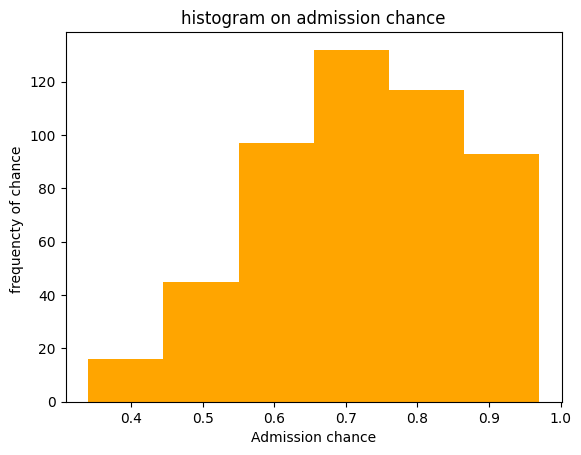

In [14]:
# histogram chart 

plt.hist(df['chance'],bins=6,color='orange')
plt.title("histogram on admission chance")
plt.xlabel("Admission chance")
plt.ylabel("frequencty of chance ") 
plt.show()

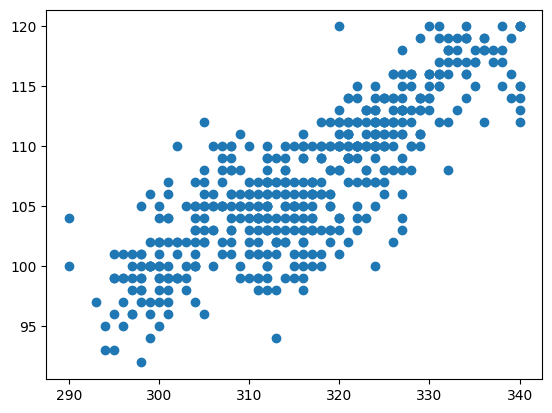

In [15]:
plt.scatter(df['gre'],df['toefl'])
plt.show()

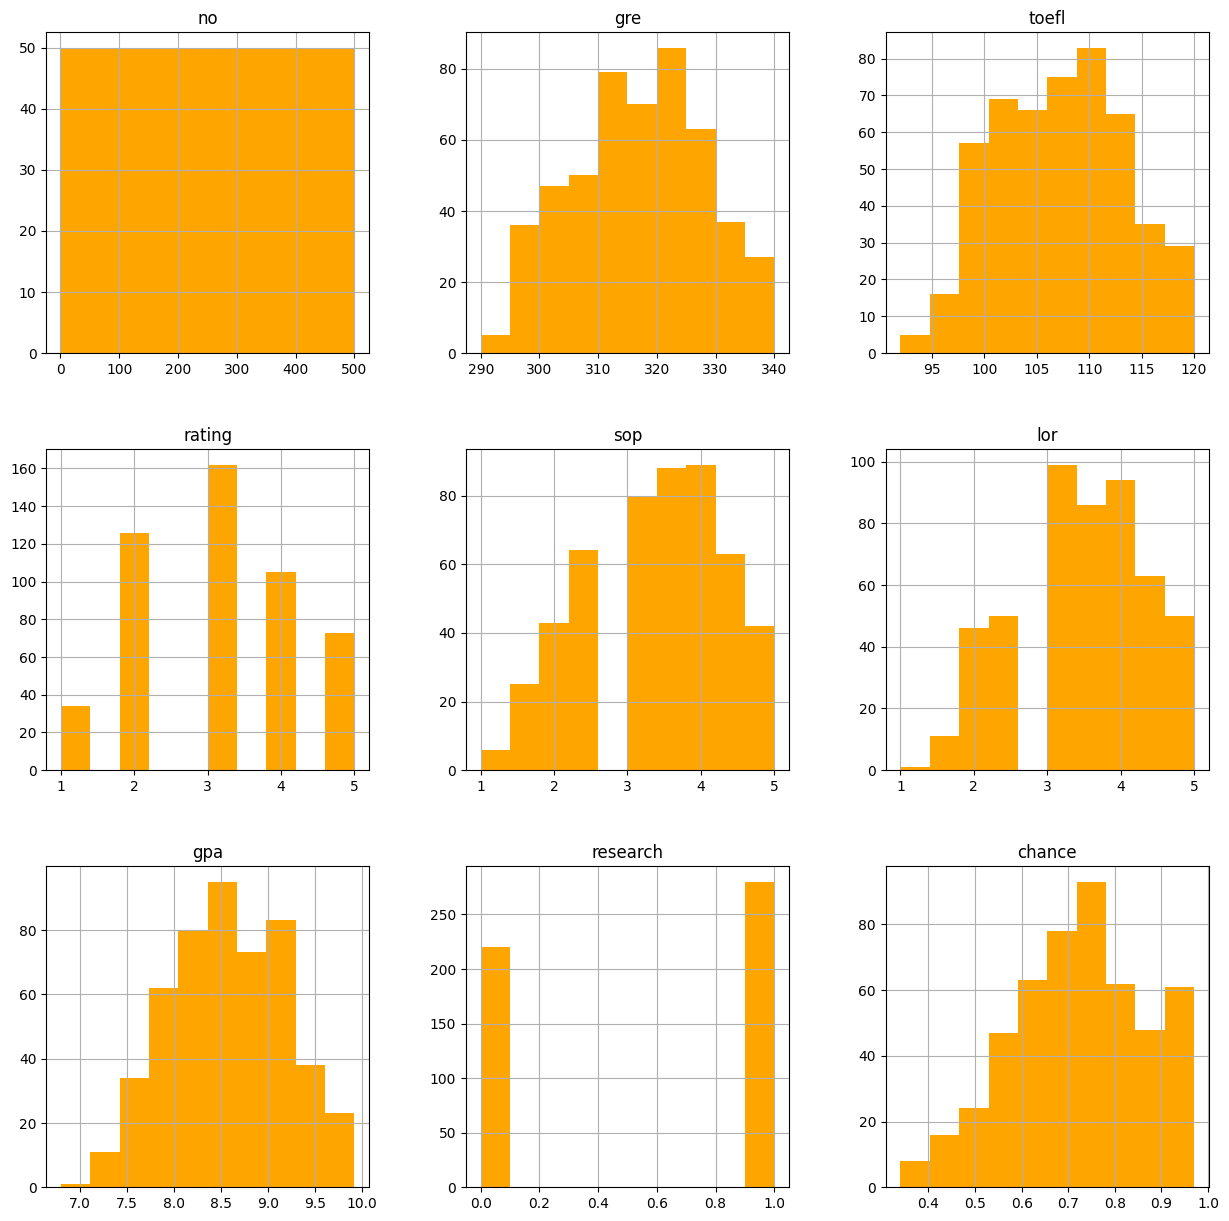

In [16]:
df.hist(bins=10,color='orange',figsize=(15,15))
plt.show()

## data preprocessing

In [17]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x=[i for i in var if i not in ['chance']]
x=df[x]

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train

,gre,toefl,rating,sop,lor,gpa,research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [20]:
y_train

249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: chance, Length: 400, dtype: float64

In [21]:
x_test

,gre,toefl,rating,sop,lor,gpa,research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [22]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: chance, Length: 100, dtype: float64

 # Data normalization is important in order to represent data in comparable scales. 

In [23]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

**MIN - MAX Scaler**
its Better use always the Scaler methods to improve the Accuracy  

***chance is greater than 85% so consider 1 otherwise 0.***

In [24]:
cy_train= [1 if chance > 0.85 else 0 for chance in y_train]
cy_train =np.array(cy_train)

In [25]:
cy_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [26]:
cy_test= [1 if chance > 0.85 else 0 for chance in y_test]
cy_test =np.array(cy_test)

In [27]:
cy_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## Apply an Algorithms

***logistic regression***

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr= LogisticRegression()
lr.fit(x_train,cy_train)

LogisticRegression()

In [30]:
Result_score= lr.score(x_test,cy_test)

In [31]:
print(Result_score)

0.96


***random Forest***  

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
RF= RandomForestRegressor()
RF.fit(x_train,cy_train)

RandomForestRegressor()

In [34]:
result= RF.score(x_test,cy_test)

In [35]:
print(result)

0.8022319347319348


***svm***

In [36]:
from sklearn.svm import SVC

In [37]:
sv= SVC()
sv.fit(x_train,cy_train)

SVC()

In [38]:
result= sv.score(x_test,cy_test)
print(result)

0.96


**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,cy_train)

DecisionTreeClassifier()

In [41]:
result= dt.score(x_test,cy_test)
print(result)

0.96
